Text(0.5, 0.5, '$y$')

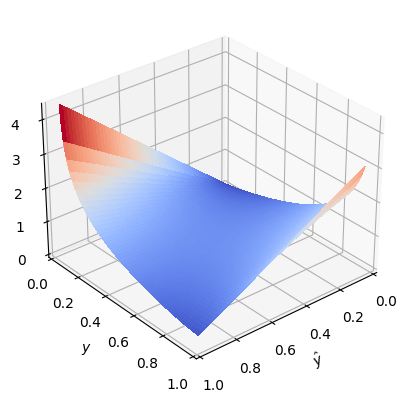

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

y = np.linspace(0.01,0.95, 1000)
y_hat = np.linspace(0.01,0.95, 1000)

[Y,YHAT] = np.meshgrid(y,y_hat)
Z = YHAT * np.log(Y) + (1-YHAT) * np.log(1-Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(30,50)

surf = ax.plot_surface(YHAT, Y, -Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xbound(0,1)
ax.set_ybound(0,1)
ax.set_zbound(0,np.max(-Z))
ax.set_xlabel(r"$\hat{y}$")
ax.set_ylabel(r"$y$")

In [2]:
x0 = np.random.randn(100)*0.5
x1 = np.random.randn(100)*0.5 + 1.5
y0 = np.zeros(100)
y1 = np.ones(100)

xs = np.concatenate((x0,x1))
ys = np.concatenate((y0,y1))

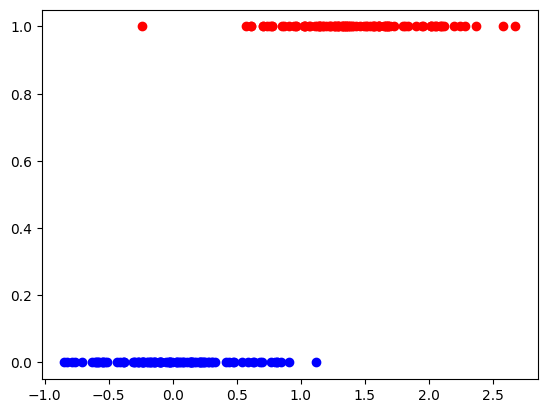

In [3]:
plt.plot(x0, y0, 'bo')
plt.plot(x1, y1, 'ro')

In [4]:
def mse(y, yhat):
    return np.mean((y-yhat)**2)
def cross_entropy(y,yhat):
    ces = -y*np.log(yhat)-(1-y)*np.log(1-yhat)
    return np.mean(ces)

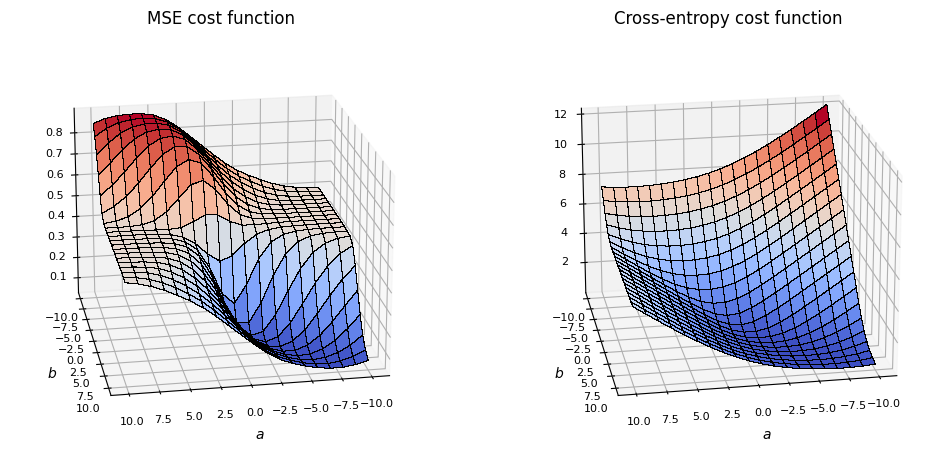

In [54]:
def pred(a,b,x):
    linear = a*x + b
    return 1/(1+np.exp(-linear))


aa = np.linspace(-10,10,20)
bb = np.linspace(-10,10,20)

[A,B] = np.meshgrid(aa,bb)

mse_cost_surface = np.zeros((len(aa),len(bb)))
cross_entropy_cost_surface = np.zeros((len(aa),len(bb)))

for i, a in enumerate(aa):
    for j, b in enumerate(bb):
        yhat = pred(a,b,xs)
        mse_cost_surface[i,j] = mse(ys,yhat)
        cross_entropy_cost_surface[i,j] = cross_entropy(ys, yhat)
       
        
fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(1,2,1, projection="3d")

ax.view_init(20,80)

surf = ax.plot_surface(A, B, mse_cost_surface, cmap=cm.coolwarm,
                       edgecolors="k", linewidth=0.01, antialiased=False)
# ax.set_xbound(0,1)
# ax.set_ybound(0,1)
# ax.set_zbound(0,np.max(-Z))
ax.set_title("MSE cost function")
ax.set_xlabel(r"$a$")
ax.set_ylabel(r"$b$")
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
# Cross entropy

ax2 = fig.add_subplot(1,2,2, projection="3d")
ax2.view_init(20,80)

surf = ax2.plot_surface(A, B, cross_entropy_cost_surface, cmap=cm.coolwarm,
                       edgecolors="k", linewidth=0.01, antialiased=False)
# ax.set_xbound(0,1)
# ax.set_ybound(0,1)
# ax.set_zbound(0,np.max(-Z))
ax2.set_title("Cross-entropy cost function")
ax2.set_xlabel(r"$a$")
ax2.set_ylabel(r"$b$")
ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='minor', labelsize=8)

fig.savefig("mse_cross_entropy.png")
